# importing Necessary Libraries


In [89]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [93]:
# collect the dataset from kaggle and which is in csv file 
#convert it to pandas DataFrame
insurance = pd.read_csv(r"insurance.csv")

In [94]:
#first few rows 
#based upon this input columns we are going to predict the medical insurance premium
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# some Basic Data Analysis

In [95]:
#information about the column
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [96]:
# out of 7 columns 4 columns are numerical 
#we get the statistical summary about the numerical columns
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [97]:
#we look how many rows and columns in data 
insurance.shape

(1338, 7)

In [98]:
#there are total 1338 rows and 7 columns .
#out of which 4 columns are numerical 

# Exploratory Data Analysis

In [99]:
#checking the null value in the columns 
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [100]:
#there is no null value in any columns 
#so our data is completely good and  clean

In [101]:
#now checking how the data is distributed 
# by checking the numerical column

<Figure size 600x600 with 0 Axes>

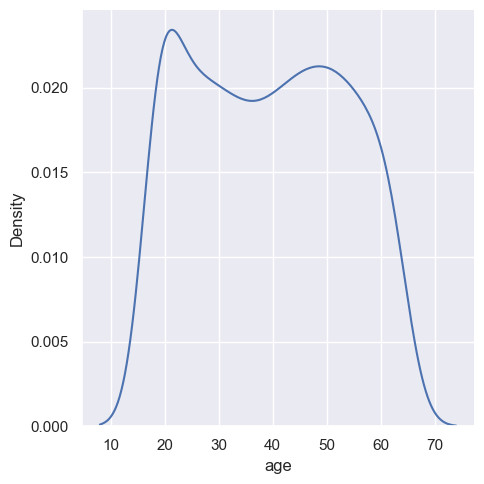

In [102]:
#Data Distribution for Numerical Column - Age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['age'],kind="kde")
plt.show()

In [103]:
insurance["age"].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [104]:
#the age of the column 20 is morecompare to the other ages
#the age column distributed from age 18 to 64 
#64 is the maximum value

<Figure size 600x600 with 0 Axes>

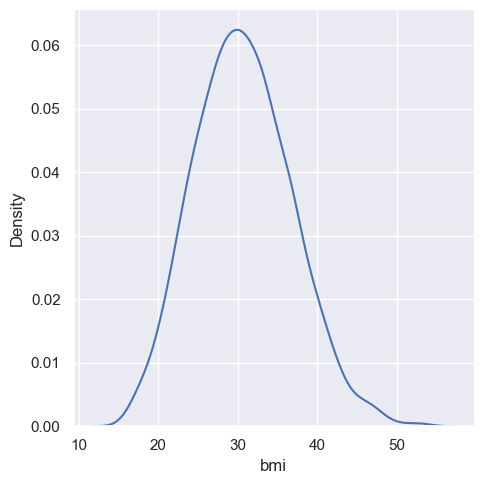

In [105]:
#Data Distribution for Numerical Column - BMI
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['bmi'],kind="kde")
plt.show()

In [106]:
#bmi range max distributed between 30 ato 35 
#after bmi  40  may be they are overweight 

<Figure size 600x600 with 0 Axes>

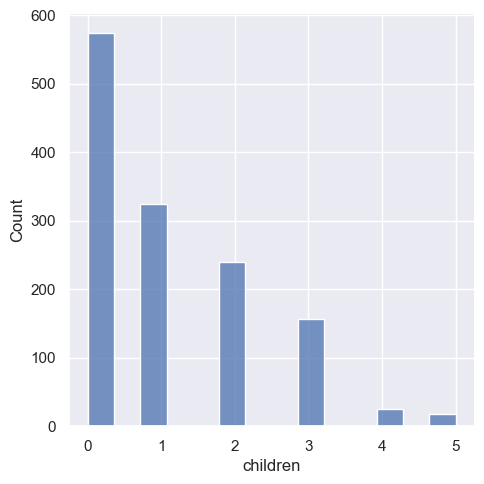

In [107]:
#Data Distribution for Numerical Column - children
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['children'])
plt.show()

In [108]:
insurance["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

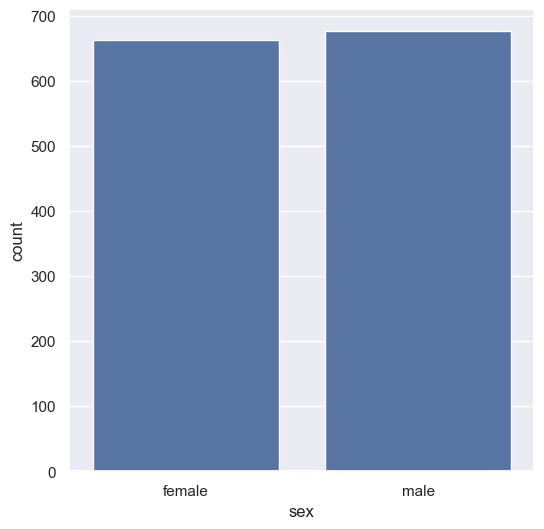

In [109]:
#Column charts for Categorical Column - sex
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance['sex'], data = insurance)
plt.show()

In [110]:
insurance["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

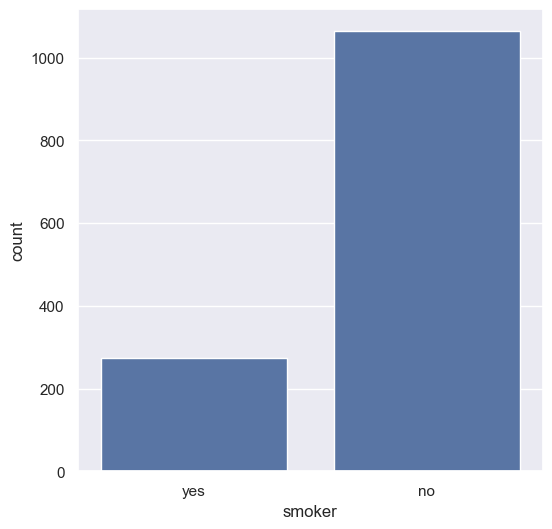

In [111]:
#Column charts for Categorical Column - smoker
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance['smoker'], data = insurance)
plt.show()

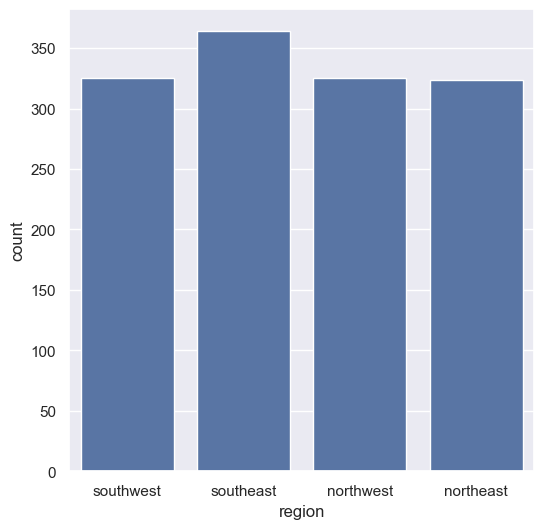

In [112]:
#Column charts for Categorical Column - region
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance['region'], data = insurance)
plt.show()

In [113]:
insurance['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [114]:
#except smoker column all this value are equally distributed 
#so our data is good with the data distribution and analysis

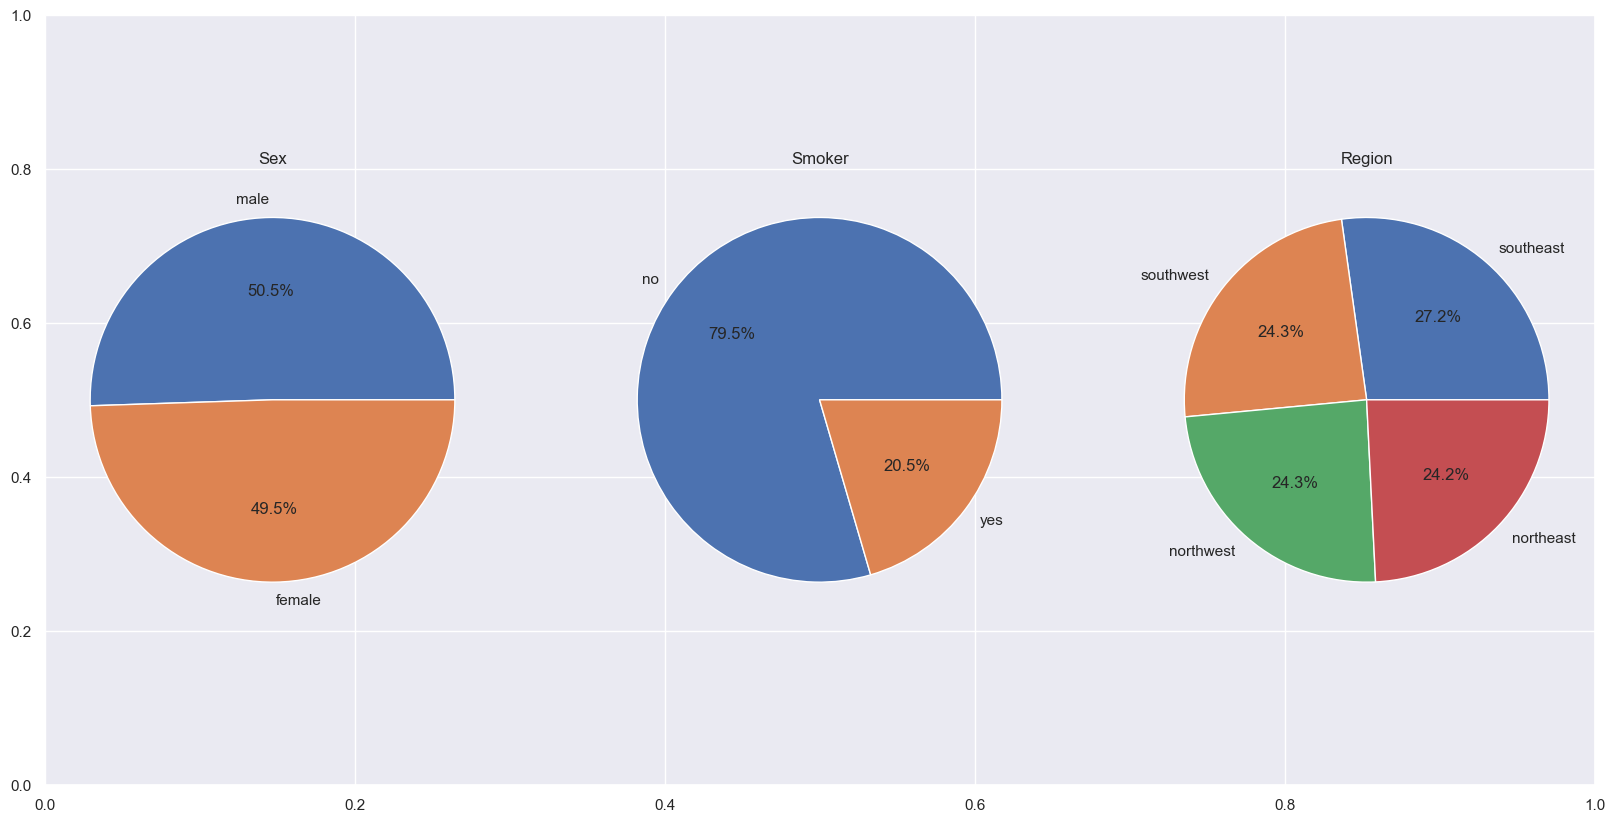

In [115]:
features = ['sex', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = insurance[col].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
    # Add a title for each subplot
    plt.title(col.capitalize())


plt.show()

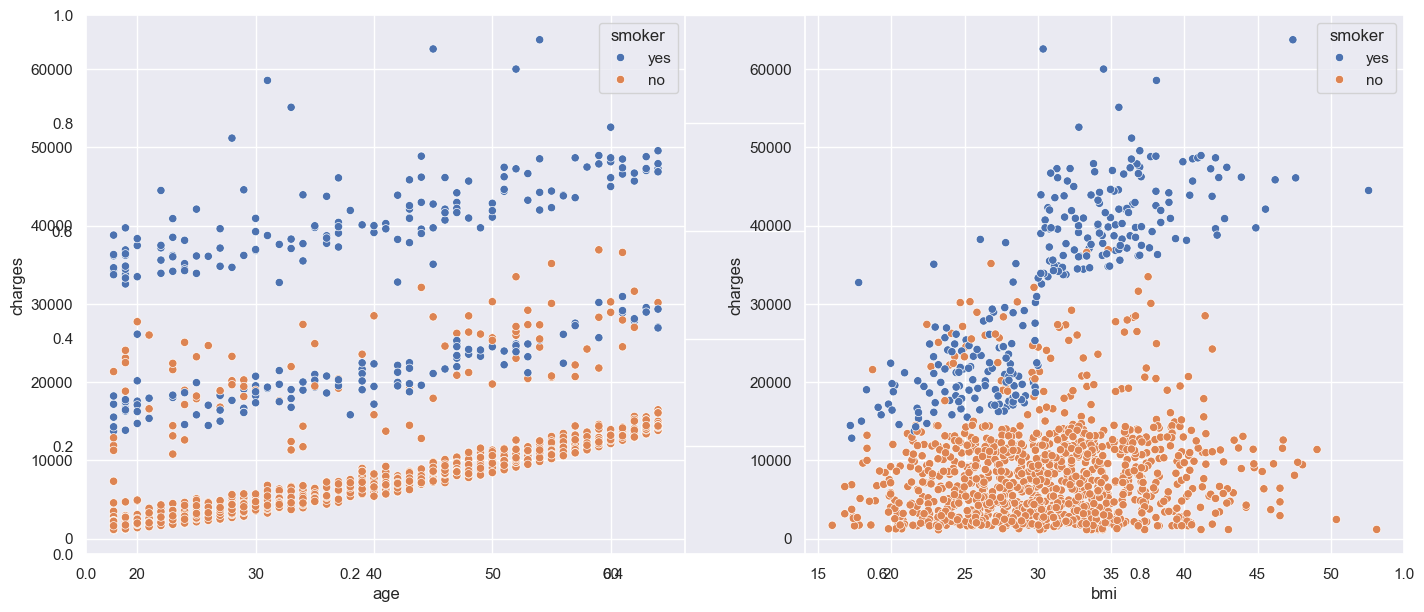

In [116]:
features = ['age', 'bmi']
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=insurance, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

# some observations

In [117]:
#The data provided to us is equally distributed among the sex and
# The data provided to us is equally distributed among the sex and

In [118]:
#Charges are on the higher side for males as compared to females but the difference is not that much.
#Premium charged from the smoker is around thrice that which is charged from non-smokers.
#Charges are approximately the same in the given four regions.

In [119]:
#A clear distinction can be observed here between the charges that smokers have to pay.
#Also here as well we can observe that as the age of a person increases premium prices goes up as well.

# DATA PREPROCESSING

In [120]:
duplicates = insurance.duplicated()
has_duplicates = duplicates.any()
print("Are there duplicates in the DataFrame?", has_duplicates)

Are there duplicates in the DataFrame? True


In [121]:
# Count duplicates
duplicate_count = insurance.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 1


In [122]:
# View duplicate rows
duplicate_rows = insurance[insurance.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

Duplicate rows:
      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


## Drop the duplicate value 


In [123]:
insurance.drop_duplicates(inplace=True)

### now we check if there is any outlier 

<Axes: ylabel='age'>

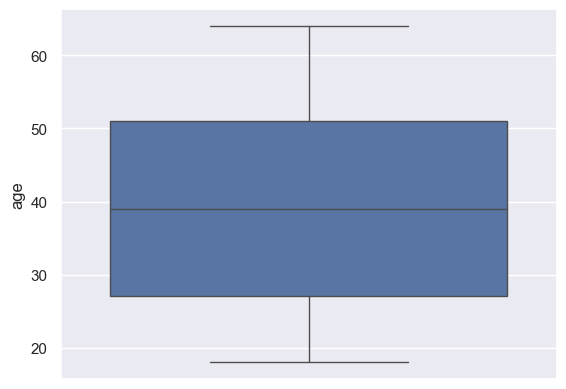

In [124]:
sns.boxplot(insurance['age'])

### we can see that there are no outliers present in age column

<Axes: ylabel='bmi'>

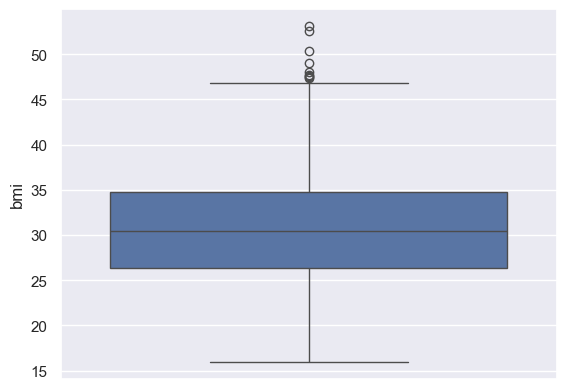

In [125]:
sns.boxplot(insurance['bmi'])

In [126]:
#AS THE  presence of outliers present in bmi column we need to treat 
##the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [127]:
Q1=insurance['bmi'].quantile(0.25)
Q2=insurance['bmi'].quantile(0.5)
Q3=insurance['bmi'].quantile(0.75)

### Calculating the Interquartile Range (IQR):

In [128]:
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


In [129]:
#Now we successfully treated the outliers 

# Data Wrangling

### checking whether bmi and age  follow normal or standard distribution

In [130]:
print("Skewness:", insurance['bmi'].skew())
print("Kurtosis:", insurance['bmi'].kurt())

Skewness: 0.28391419385321137
Kurtosis: -0.052947204436257334


# Conclusion:

In [131]:
# Skewness (0.28) being close to 0 and
# kurtosis (-0.05) being close to 0 (in excess kurtosis terms)
# suggest that your data is approximately normally distributed

In [132]:
print("Skewness:", insurance['age'].skew())
print("Kurtosis:", insurance['age'].kurt())

Skewness: 0.054780773126998195
Kurtosis: -1.244406407567826


In [133]:
# The age data in the insurance dataset is symmetric with lighter tails,
# suggesting a relatively normal-like distribution, making it suitable 
# for various statistical analyses while being mindful of the 
# implicationsof its flatter shape.



### Encoding the categorical features

In [134]:
#we have 3 categorial column we have to convert it into numerical column 
#convert sex column to numerical column 

insurance.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [135]:
#convert smoker column to numerical column 
insurance.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

In [136]:
#convert region column to numerical column 
insurance.replace({'region':{'northwest':0,'northeast':1,'southeast':2, 'southwest':3}}, inplace=True)

## Correlation Analysis

In [137]:
correlation_matrix = insurance.corr()
print(correlation_matrix)

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.019814  0.109344  0.041536 -0.025587  0.001771  0.298308
sex       0.019814  1.000000 -0.046397 -0.017848 -0.076596 -0.008998 -0.058044
bmi       0.109344 -0.046397  1.000000  0.012755  0.003746  0.156784  0.198401
children  0.041536 -0.017848  0.012755  1.000000  0.007331 -0.002842  0.067389
smoker   -0.025587 -0.076596  0.003746  0.007331  1.000000  0.012736  0.787234
region    0.001771 -0.008998  0.156784 -0.002842  0.012736  1.000000  0.010767
charges   0.298308 -0.058044  0.198401  0.067389  0.787234  0.010767  1.000000


# Visualizing the Correlation Matrix:

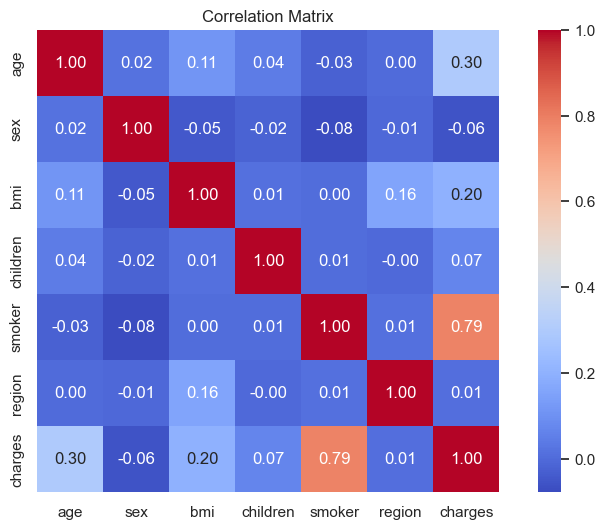

In [138]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### - conclusion

#### The strongest predictors for insurance charges are smoking status, age, and BMI

#### while the number of children, sex, and region show minimal influence

# Model Development

In [139]:
X=insurance.drop(['charges'],axis=1)
Y=insurance[['charges']]

In [140]:
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 insurance1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})


In [141]:
insurance1

,train acc,test acc,cvs
0,0.741644,0.777985,0.746968
1,0.756269,0.706398,0.746968
2,0.729449,0.806103,0.746968
3,0.754323,0.732024,0.746968
4,0.742720,0.780108,0.746968
5,0.753305,0.731034,0.746968
6,0.741163,0.776345,0.746968
7,0.731589,0.796789,0.746968
8,0.751825,0.741619,0.746968
9,0.756238,0.722500,0.746968


In [142]:
# We have identified the best random_state number for this data set as 42 .
# Now we fix this random_state and try with different ml algorithms for better score 
# or accuracy.

# Simple Linear Regression

In [143]:
#Train-Test Split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
print("Linear Regression")
#Model Initialization and Fitting
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
#Performance Evaluation
print("Training R-squared",lrmodel.score(xtrain,ytrain))
print("Testing R-squared",lrmodel.score(xtest,ytest))
print("Cross-Validation Score",cross_val_score(lrmodel,X,Y,cv=5,).mean())

Linear Regression
Training R-squared 0.729449036210828
Testing R-squared 0.8061028038524825
Cross-Validation Score 0.7469679900466865


### Support Vector Regression

In [144]:
print("SVR")
#Model Initialization and Fitting
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
#Predictions
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
#Performance Evaluation
print("Training R-squared",r2_score(ytrain,ypredtrain1))
print("Testing R-squared",r2_score(ytest,ypredtest1))
print("Cross-Validation Score",cross_val_score(svrmodel,X,Y,cv=5,).mean())

SVR
Training R-squared -0.10151181672467358
Testing R-squared -0.13444553609701226
Cross-Validation Score -0.10374355553412987


### Random Forest Regression

In [145]:
print("RandomForestRegressor")
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
#Predictions
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
#Performance Evaluation
print("Training R-squared",r2_score(ytrain,ypredtrain2))
print("Testing R-squared",r2_score(ytest,ypredtest2))
print("Cross-Validation Score",cross_val_score(rfmodel,X,Y,cv=5,).mean())

RandomForestRegressor
Training R-squared 0.9738161643742801
Testing R-squared 0.8819349806115804
Cross-Validation Score 0.8363084945977217


In [146]:
#GridSearchCV for Hyperparameter Tuning
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'n_estimators': 120}


In [147]:
#applying Randomforest after finding best parameter value
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Training R-squared",r2_score(ytrain,ypredtrain2))
print("Testing R-squared",r2_score(ytest,ypredtest2))
print("Cross-Validation Score",cross_val_score(rfmodel,X,Y,cv=5,).mean())

Training R-squared 0.9746304366493532
Testing R-squared 0.8822618062611055
Cross-Validation Score 0.836689809669368


# GradientBoostingRegressor

In [148]:
print("GradientBoostingRegressor")
#Model Initialization and Fitting
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
#Predictions
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
#Performance Evaluation
print("R2 score on training set",r2_score(ytrain,ypredtrain3))
print("R2 score on test set: ",r2_score(ytest,ypredtest3))
print("Cross-validation score",cross_val_score(gbmodel,X,Y,cv=5,).mean())

GradientBoostingRegressor
R2 score on training set 0.8924206179804557
R2 score on test set:  0.903479558267343
Cross-validation score 0.8556277564638058


In [149]:
#GridSearchCV for Hyperparameter Tuning
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'learning_rate': 0.2, 'n_estimators': 19}


In [150]:
#applying GradientBoostingRegressor after finding best parameter value
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("R2 score on training set",r2_score(ytrain,ypredtrain3))
print("R2 score on test set: ",r2_score(ytest,ypredtest3))
print("Cross-validation score",cross_val_score(gbmodel,X,Y,cv=5,).mean())

R2 score on training set 0.8682397447116926
R2 score on test set:  0.9017109716082662
Cross-validation score 0.86051471152677


# XgBoostRegressor

In [154]:
print("XgBoostRegressor")
#Model Initialization and Fitting
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
# Predictions
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
#Performance Evaluation
print("R2 score on training set",r2_score(ytrain,ypredtrain4))
print("R2 score on test set: ",r2_score(ytest,ypredtest4))
print("Cross-validation score",cross_val_score(xgmodel,X,Y,cv=5,).mean())

XgBoostRegressor
R2 score on training set 0.9956524534274677
R2 score on test set:  0.8569003063575884
Cross-validation score 0.8084074198536367


In [155]:
#GridSearchCV for Hyperparameter Tuning
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}


In [153]:
#applying XGBoostRegressor after finding best parameter value
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("R2 score on training set",r2_score(ytrain,ypredtrain4))
print("R2 score on test set: ",r2_score(ytest,ypredtest4))
print("Cross-validation score",cross_val_score(xgmodel,X,Y,cv=5,).mean())


R2 score on training set 0.8690027517330565
R2 score on test set:  0.9040460278690784
Cross-validation score 0.861964908048438


# now we will compare all the Models

In [156]:
import pandas as pd
# Data
data = {
    'Model': ['LinearRegression', 'SupportVectorMachine', 'RandomForest', 'GradientBoost', 'XGBoost'],
    'Train Accuracy': [0.729, -0.105, 0.974, 0.868, 0.870],
    'Test Accuracy': [0.806, -0.134, 0.882, 0.901, 0.904],
    'CV Score': [0.747, 0.103, 0.836, 0.860, 0.860]
}
# Convert to DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
df

,Model,Train Accuracy,Test Accuracy,CV Score
0,LinearRegression,0.729,0.806,0.747
1,SupportVectorMachine,-0.105,-0.134,0.103
2,RandomForest,0.974,0.882,0.836
3,GradientBoost,0.868,0.901,0.860
4,XGBoost,0.870,0.904,0.860


# From the above table we can observe that XGBoost is the best model.


## Now we need to identify the important features for predicting of charges

In [157]:
# Assuming 'grid' is the result of your GridSearchCV process
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])

# Display the feature importance DataFrame
feats

,Importance
age,0.040045
sex,0.000000
bmi,0.126012
children,0.011154
smoker,0.815517
region,0.007272


In [158]:
# Filter features with importance greater than 0.01
important_features = feats[feats['Importance'] > 0.001]

# Display the important features
important_features

,Importance
age,0.040045
bmi,0.126012
children,0.011154
smoker,0.815517
region,0.007272


# FINAL MODEL 

In [159]:
# Drop unnecessary columns
insurance.drop(['sex'], axis=1, inplace=True)

# Features and target
X = insurance.drop(['charges'], axis=1)
Y = insurance['charges']

In [160]:
# Split into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
# Define the model
finalmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)

In [161]:
# Train the model
finalmodel.fit(xtrain, ytrain)
# Predictions
ypredtrain4 = finalmodel.predict(xtrain)
ypredtest4 = finalmodel.predict(xtest)

In [162]:
# Metrics
print("R2 score on training set:", r2_score(ytrain, ypredtrain4))
print("R2 score on test set:", r2_score(ytest, ypredtest4))
# Cross-validation
print("Cross-validation score (cv=5):", cross_val_score(finalmodel, X, Y, cv=5).mean())

R2 score on training set: 0.8695760408802804
R2 score on test set: 0.9048723369674996
Cross-validation score (cv=5): 0.861914912474672


## now we test the model 

In [163]:
# input test data 
xtest

,age,bmi,children,smoker,region
900,49,22.515,0,0,1
1064,29,25.600,4,0,3
1256,51,36.385,3,0,0
298,31,34.390,3,1,0
237,31,38.390,2,0,2
...,...,...,...,...,...
534,64,40.480,0,0,2
542,63,36.300,0,0,2
760,22,34.580,2,0,1
1284,61,36.300,1,1,3


In [164]:
#output test data
ytest

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

### checking model prediction

In [165]:
xtest.shape[0]

268

In [166]:
# Make predictions on the entire test set
ypredtest_all = finalmodel.predict(xtest)

# Create a DataFrame to hold the actual and predicted values side by side
results_df = pd.DataFrame({
    'Actual Charges': ytest.reset_index(drop=True),
    'Predicted Charges': ypredtest_all
})

# Display the results DataFrame
results_df.sample(100)

,Actual Charges,Predicted Charges
156,46113.51100,42946.375000
148,42969.85270,44549.425781
183,11830.60720,12652.944336
108,12269.68865,14240.229492
113,6551.75010,7984.827148
...,...,...
127,13041.92100,13908.166992
261,47055.53210,44465.113281
116,2710.82855,4745.831055
139,2473.33410,4492.376953


# SAVE MODEL

In [168]:
from pickle import dump
dump(finalmodel,open('insurancemodel.pkl','wb'))
